# **AI Enabled Car Parking**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: data/Full/img_729143007.jpg  
  inflating: data/Full/img_729160007.jpg  
  inflating: data/Full/img_729163006.jpg  
  inflating: data/Full/img_730080006.jpg  
  inflating: data/Full/img_730083006.jpg  
  inflating: data/Full/img_731170006.jpg  
  inflating: data/Full/img_731230006.jpg  
  inflating: data/Full/img_801010006.jpg  
  inflating: data/Full/img_801063006.jpg  
  inflating: data/Full/img_802063006.jpg  
  inflating: data/Full/img_802070006.jpg  
  inflating: data/Full/img_802073006.jpg  
  inflating: data/Full/img_802080006.jpg  
  inflating: data/Full/img_803043006.jpg  
  inflating: data/Full/img_803173006.jpg  
  inflating: data/Full/img_808171558.jpg  
  inflating: data/Full/img_808172159.jpg  
  inflating: data/Full/img_809023602.jpg  
  inflating: data/Full/img_809024602.jpg  
  inflating: data/Full/img_809025102.jpg  
  inflating: data/Full/img_809040602.jpg  
  inflating: data/Full/img_809042103.jpg  
  i

In [10]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FREE_DIR='/content/data/data/Free'
FULL_DIR='/content/data/data/Full'


In [11]:
def assign_label(img,label):
    return label


In [12]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,label)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Free',FREE_DIR)

100%|██████████| 1067/1067 [00:47<00:00, 22.29it/s]


In [ ]:
make_train_data('Full',FULL_DIR)

100%|██████████| 2195/2195 [01:22<00:00, 26.48it/s]


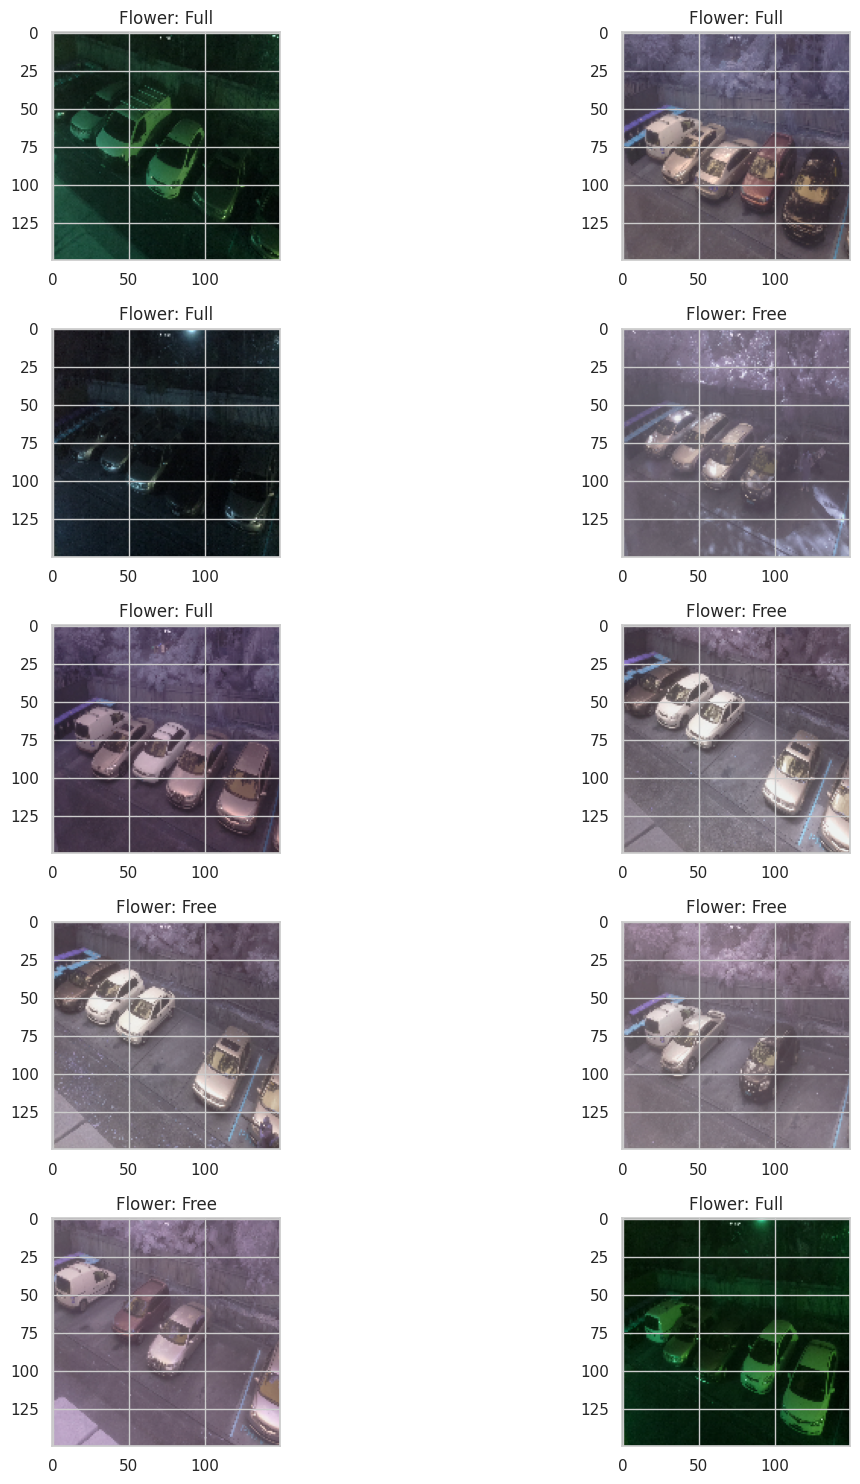

In [13]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout()

In [14]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [17]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [18]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2, activation = "softmax"))

In [21]:
batch_size=128
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [23]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [25]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
19/19 [==============================] - 189s 10s/step - loss: 0.6452 - accuracy: 0.6635 - val_loss: 0.6086 - val_accuracy: 0.6324
Epoch 2/10
19/19 [==============================] - 188s 10s/step - loss: 0.5465 - accuracy: 0.7213 - val_loss: 0.5359 - val_accuracy: 0.7512
Epoch 3/10
19/19 [==============================] - 192s 10s/step - loss: 0.5381 - accuracy: 0.7377 - val_loss: 0.6006 - val_accuracy: 0.6434
Epoch 4/10
19/19 [==============================] - 182s 10s/step - loss: 0.5142 - accuracy: 0.7468 - val_loss: 0.5244 - val_accuracy: 0.7132
Epoch 5/10
19/19 [==============================] - 189s 10s/step - loss: 0.5285 - accuracy: 0.7515 - val_loss: 0.5763 - val_accuracy: 0.6998
Epoch 6/10
19/19 [==============================] - 193s 10s/step - loss: 0.5535 - accuracy: 0.7243 - val_loss: 0.5218 - val_accuracy: 0.7341
Epoch 7/10
19/19 [==============================] - 189s 10s/step - loss: 0.4805 - accuracy: 0.7735 - val_loss: 0.5159 - val_accuracy: 0.7659
Epoch 

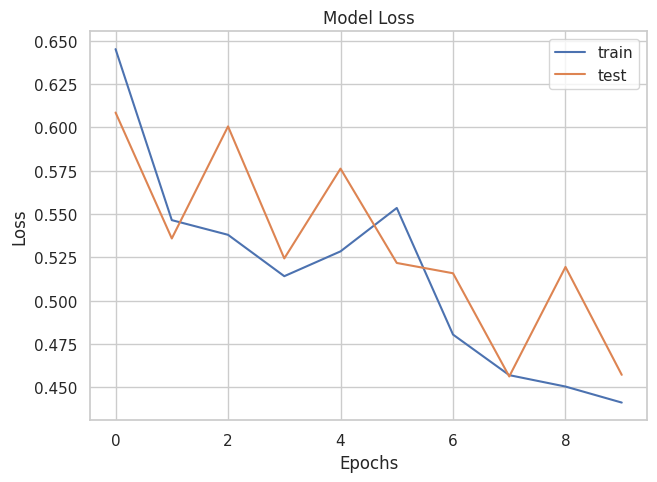

In [26]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

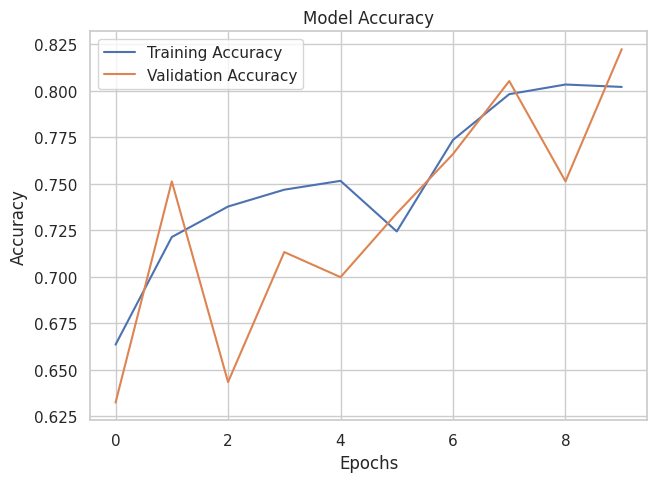

In [28]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [29]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

26/26 [==============================] - 16s 605ms/step


In [30]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

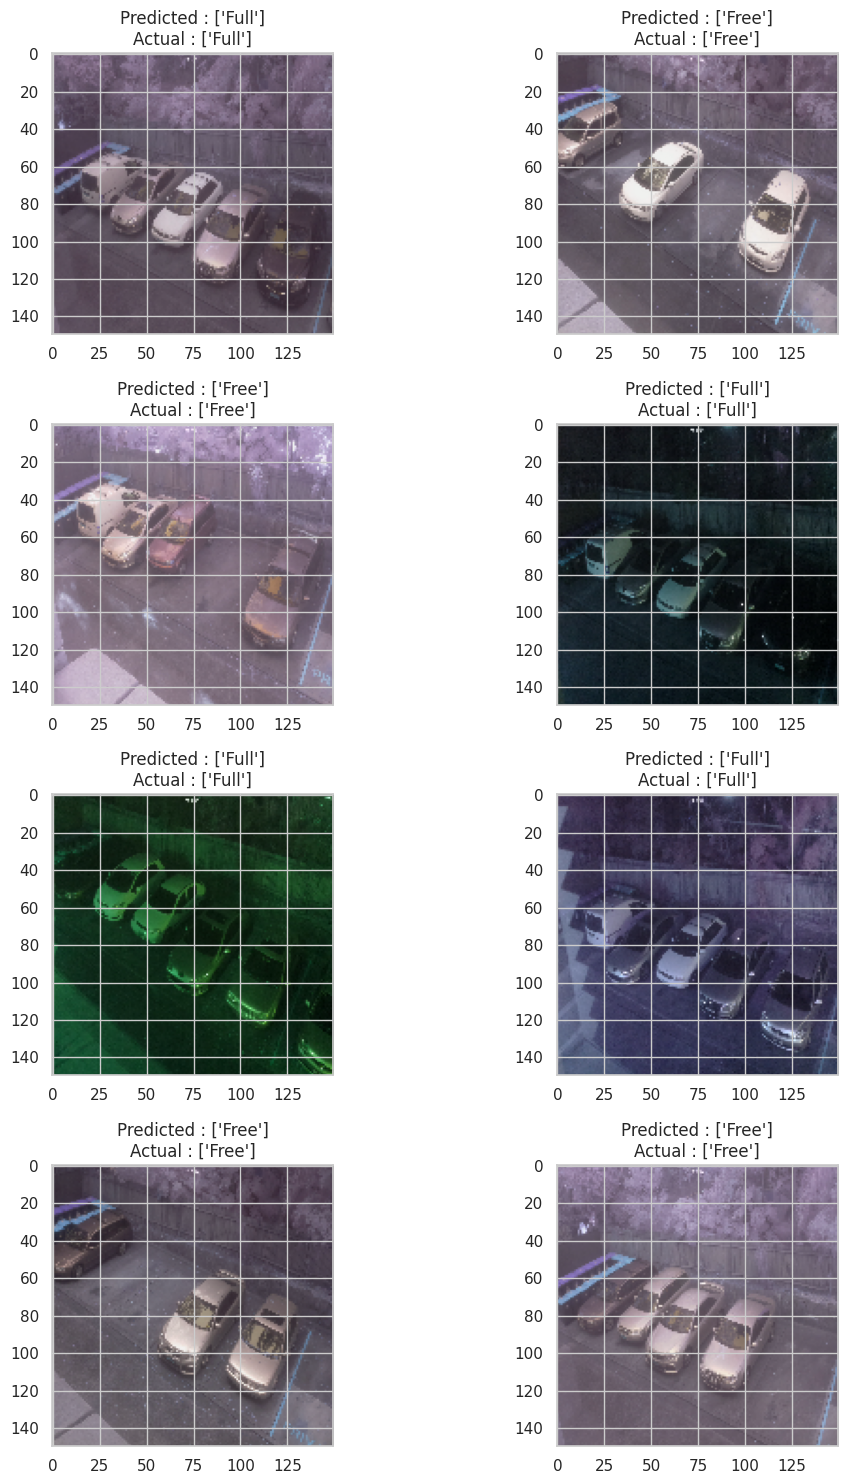

In [31]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

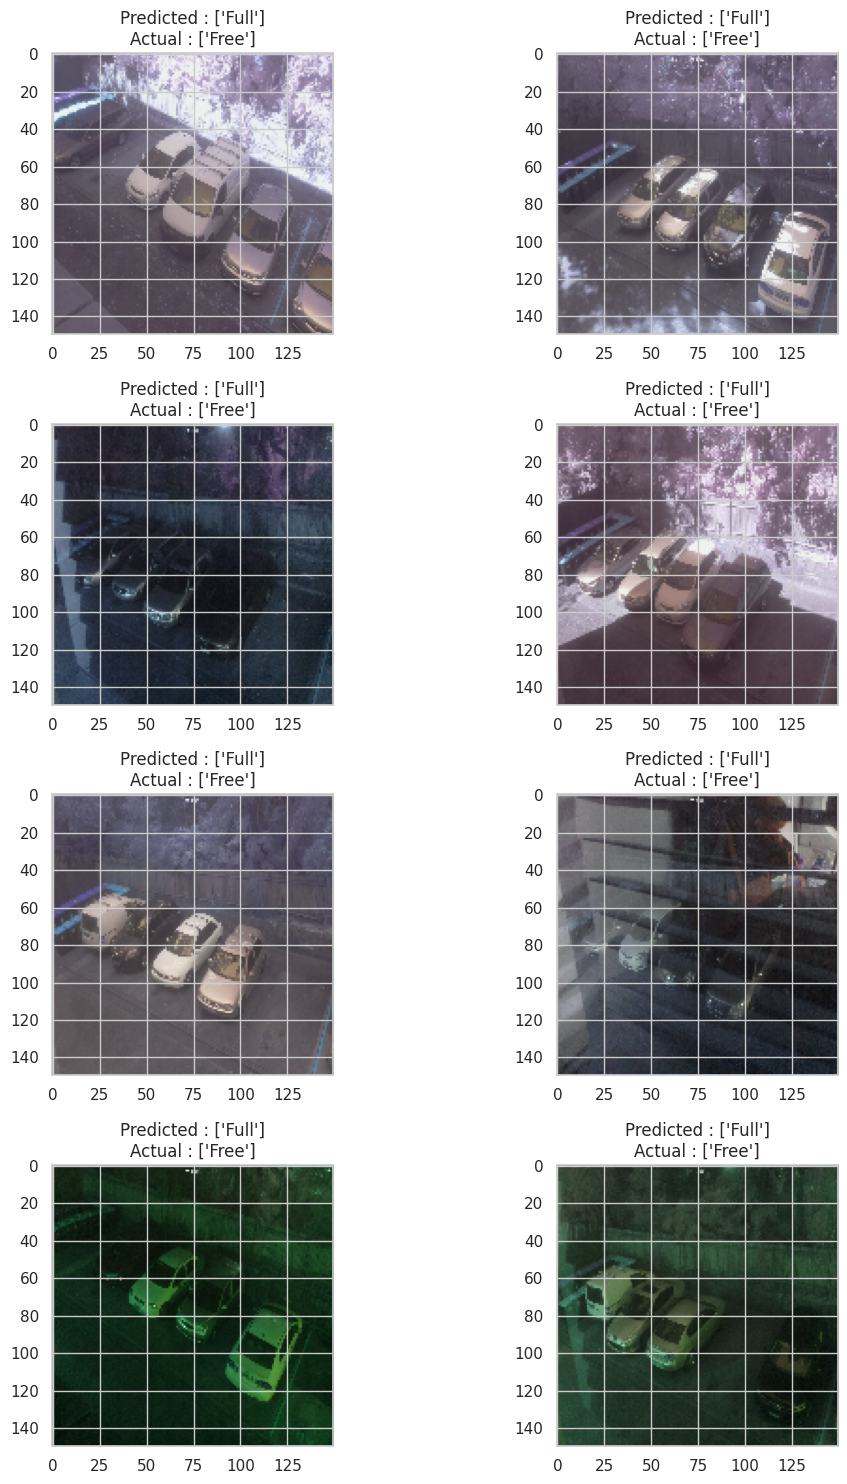

In [32]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

In [33]:
model.evaluate(x_train, y_train)

77/77 [==============================] - 44s 562ms/step - loss: 0.4275 - accuracy: 0.8487


[0.42749354243278503, 0.8487326502799988]

In [34]:
model.evaluate(x_test, y_test)

26/26 [==============================] - 19s 749ms/step - loss: 0.4572 - accuracy: 0.8223


[0.45723769068717957, 0.8223039507865906]

In [35]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = [ np.argmax(t) for t in y_test ]

26/26 [==============================] - 14s 536ms/step


Text(0.5, 80.54999999999995, 'Predicted')

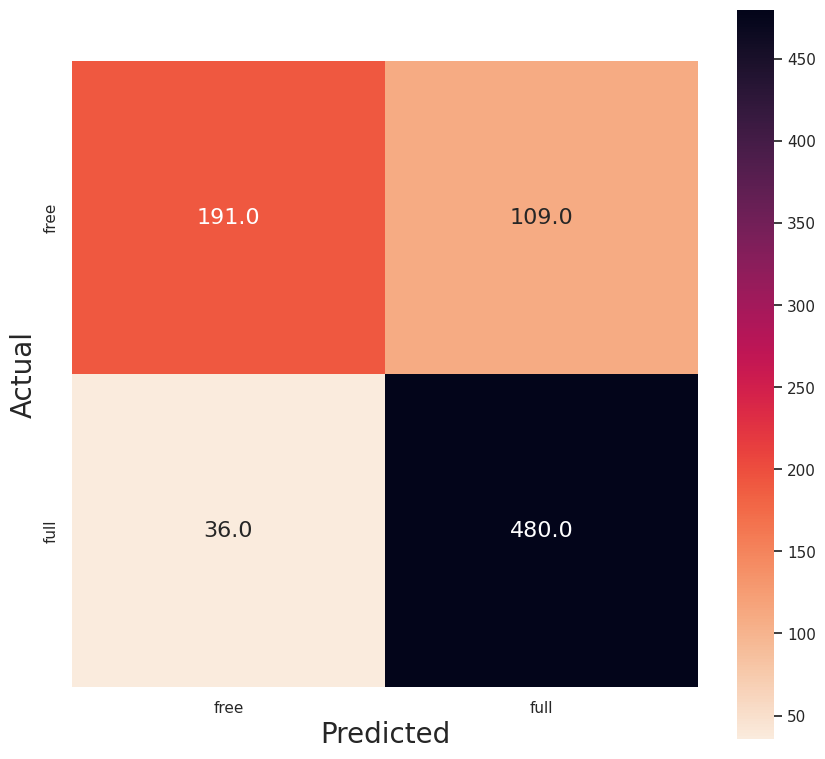

In [36]:
import seaborn as sns

label = ["free", "full"]
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(9, 9))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [37]:
model.save('Ai_enabled_car_parking.h5')